<a href="https://colab.research.google.com/github/HiyaJain22/hello/blob/main/ML_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset and split into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The First Image is 5


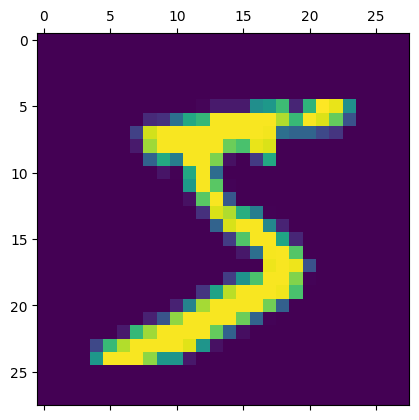

In [ ]:
plt.matshow(train_images[0])
print(f'The First Image is {train_labels[0]}')

In [ ]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
# Build the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 output neurons for 10 classes (digits 0-9)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

### Without Optimizers

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with 10 epochs
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.4188 - accuracy: 0.8754 - val_loss: 0.1672 - val_accuracy: 0.9517
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1978 - accuracy: 0.9427 - val_loss: 0.1369 - val_accuracy: 0.9586
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1518 - accuracy: 0.9556 - val_loss: 0.1140 - val_accuracy: 0.9668
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1302 - accuracy: 0.9619 - val_loss: 0.1028 - val_accuracy: 0.9704
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1117 - accuracy: 0.9675 - val_loss: 0.0987 - val_accuracy: 0.9713
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1015 - accuracy: 0.9703 - val_loss: 0.1032 - val_accuracy: 0.9712
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0938 - accuracy: 0.9722 - val_loss: 0.1029 - val_accuracy: 0.9735
Epoch 

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9764
Test accuracy: 97.64%


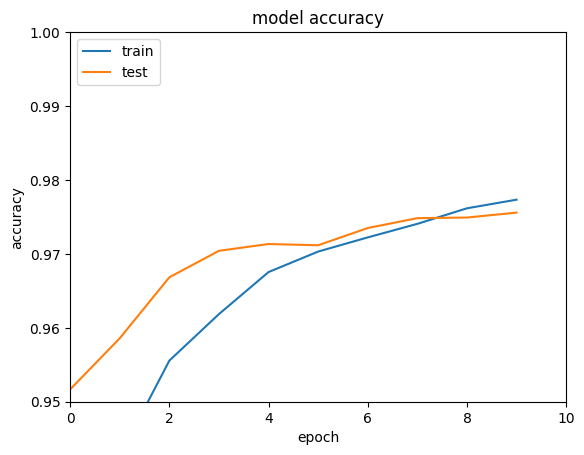

In [ ]:
# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim(0, 10)
plt.ylim(0.95, 1)
plt.show()

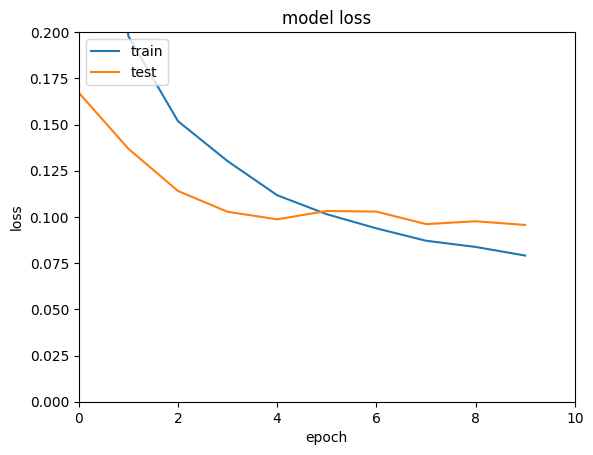

In [ ]:
# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim(0, 10)
plt.ylim(0, 0.2)
plt.show()

### With Optimizers

SGD


Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0921 - val_accuracy: 0.9803
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0919 - val_accuracy: 0.9809
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0243 - accuracy: 0.9915 - val_loss: 0.0907 - val_accuracy: 0.9807
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0906 - val_accuracy: 0.9809
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0914 - val_accuracy: 0.9809
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0899 - val_accuracy: 0.9812
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0901 - val_accuracy: 0.9811


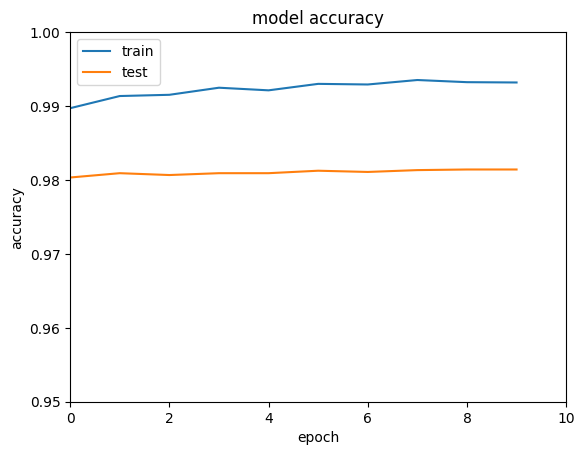

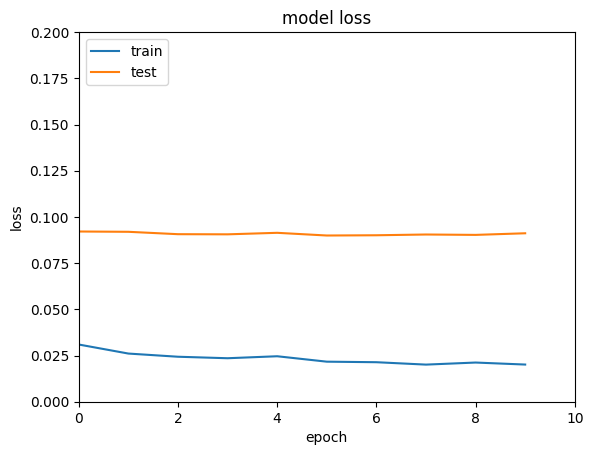





Adagrad


Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0910 - val_accuracy: 0.9811
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0910 - val_accuracy: 0.9809
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0910 - val_accuracy: 0.9812
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0201 - accuracy: 0.9932 - val_loss: 0.0910 - val_accuracy: 0.9812
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0911 - val_accuracy: 0.9813
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0912 - val_accuracy: 0.9813
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0911 - val_accuracy:

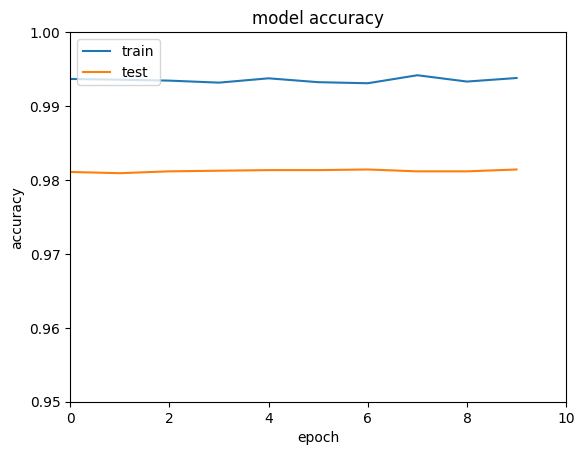

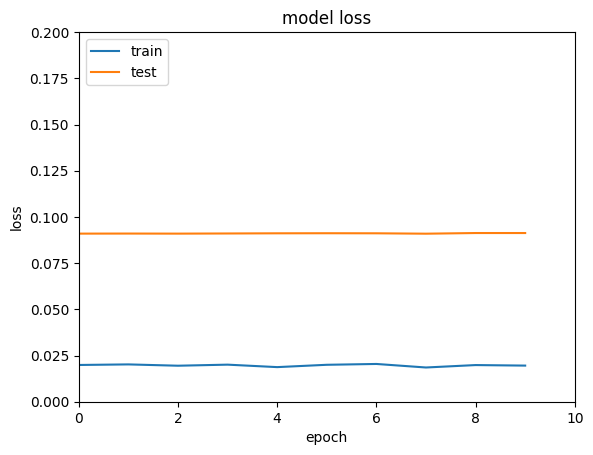





RMSprop


Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.1124 - val_accuracy: 0.9791
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.1198 - val_accuracy: 0.9797
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.1236 - val_accuracy: 0.9803
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.1244 - val_accuracy: 0.9807
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0301 - accuracy: 0.9913 - val_loss: 0.1230 - val_accuracy: 0.9803
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.1281 - val_accuracy: 0.9795
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0308 - accuracy: 0.9915 - val_loss: 0.1243 - val_accuracy:

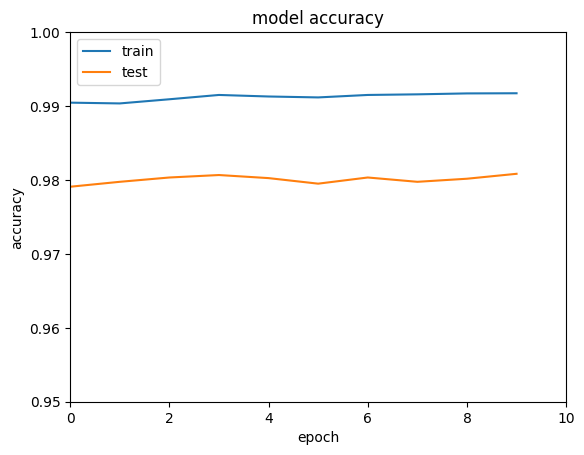

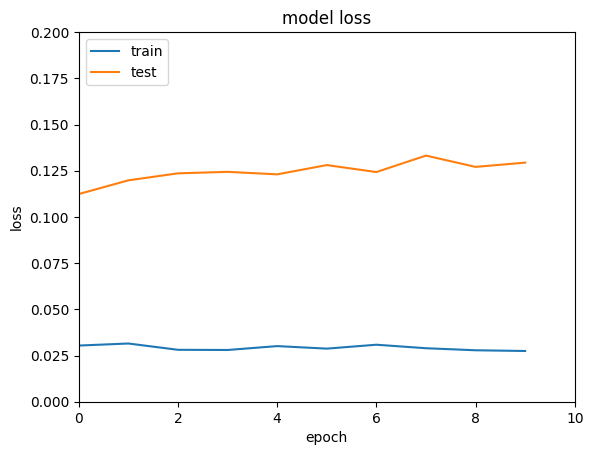





Adadelta


Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.1293 - val_accuracy: 0.9808
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.1292 - val_accuracy: 0.9809
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.1291 - val_accuracy: 0.9809
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.1291 - val_accuracy: 0.9810
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.1290 - val_accuracy: 0.9811
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0228 - accuracy: 0.9934 - val_loss: 0.1289 - val_accuracy: 0.9811
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0244 - accuracy: 0.9928 - val_loss: 0.1289 - val_accuracy

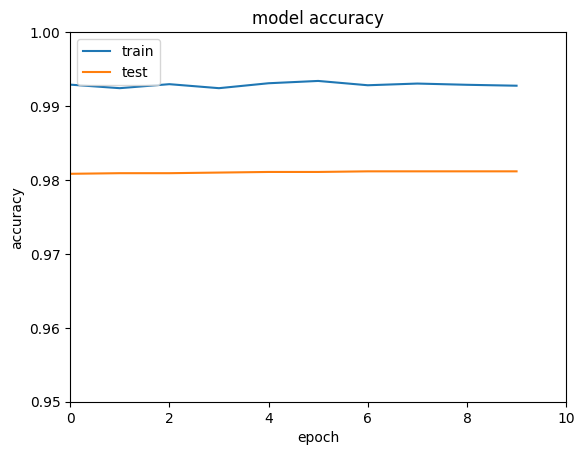

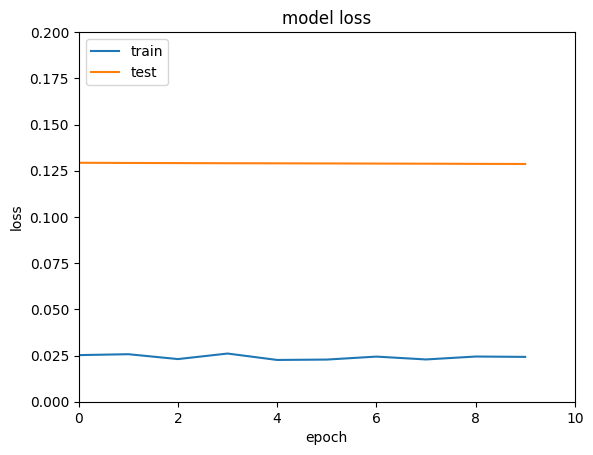





Adam


Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.1306 - val_accuracy: 0.9772
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.1410 - val_accuracy: 0.9766
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.1105 - val_accuracy: 0.9794
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.1117 - val_accuracy: 0.9790
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0313 - accuracy: 0.9894 - val_loss: 0.1113 - val_accuracy: 0.9781
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.1007 - val_accuracy: 0.9816
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.1051 - val_accuracy: 0.

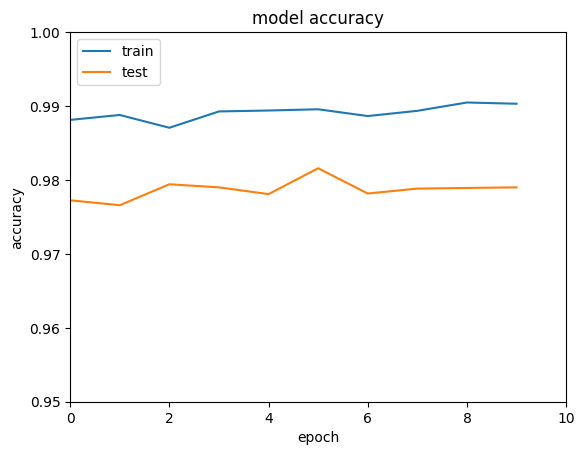

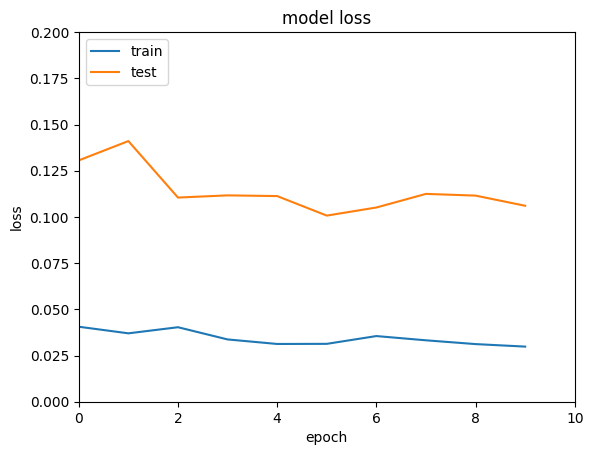

In [ ]:
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adadelta', 'Adam']
for optimizer in optimizers:

  print("\033[1m" + optimizer + "\033[0m")
  print('\n')

  # Compile the model
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model with 10 epochs
  history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
  print('\n')

  # Evaluate the model on the test data
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print(f'Test accuracy: {test_acc * 100:.2f}%')
  print('\n')

  # Summarize History for Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.xlim(0, 10)
  plt.ylim(0.95, 1)
  plt.show()
  print('\n')

  # Summarize History for Loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.xlim(0, 10)
  plt.ylim(0, 0.2)
  plt.show()
  print('\n\n\n')